## Loading Data

In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection  import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings("ignore")

In [4]:
credit = pd.read_csv('creditcard.csv')

In [5]:
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Finding Fraud and Not Fraud Cases

In [6]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
credit.shape

(284807, 31)

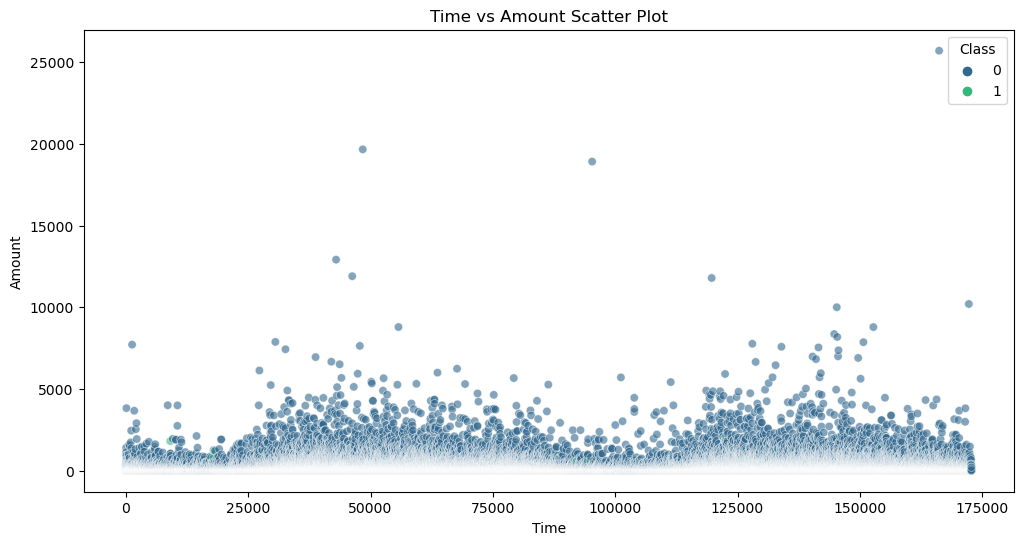

In [9]:
# Time vs Amount scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=credit, x='Time', y='Amount', hue='Class', palette='viridis', alpha=0.6)
plt.title('Time vs Amount Scatter Plot')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Class')
plt.show()

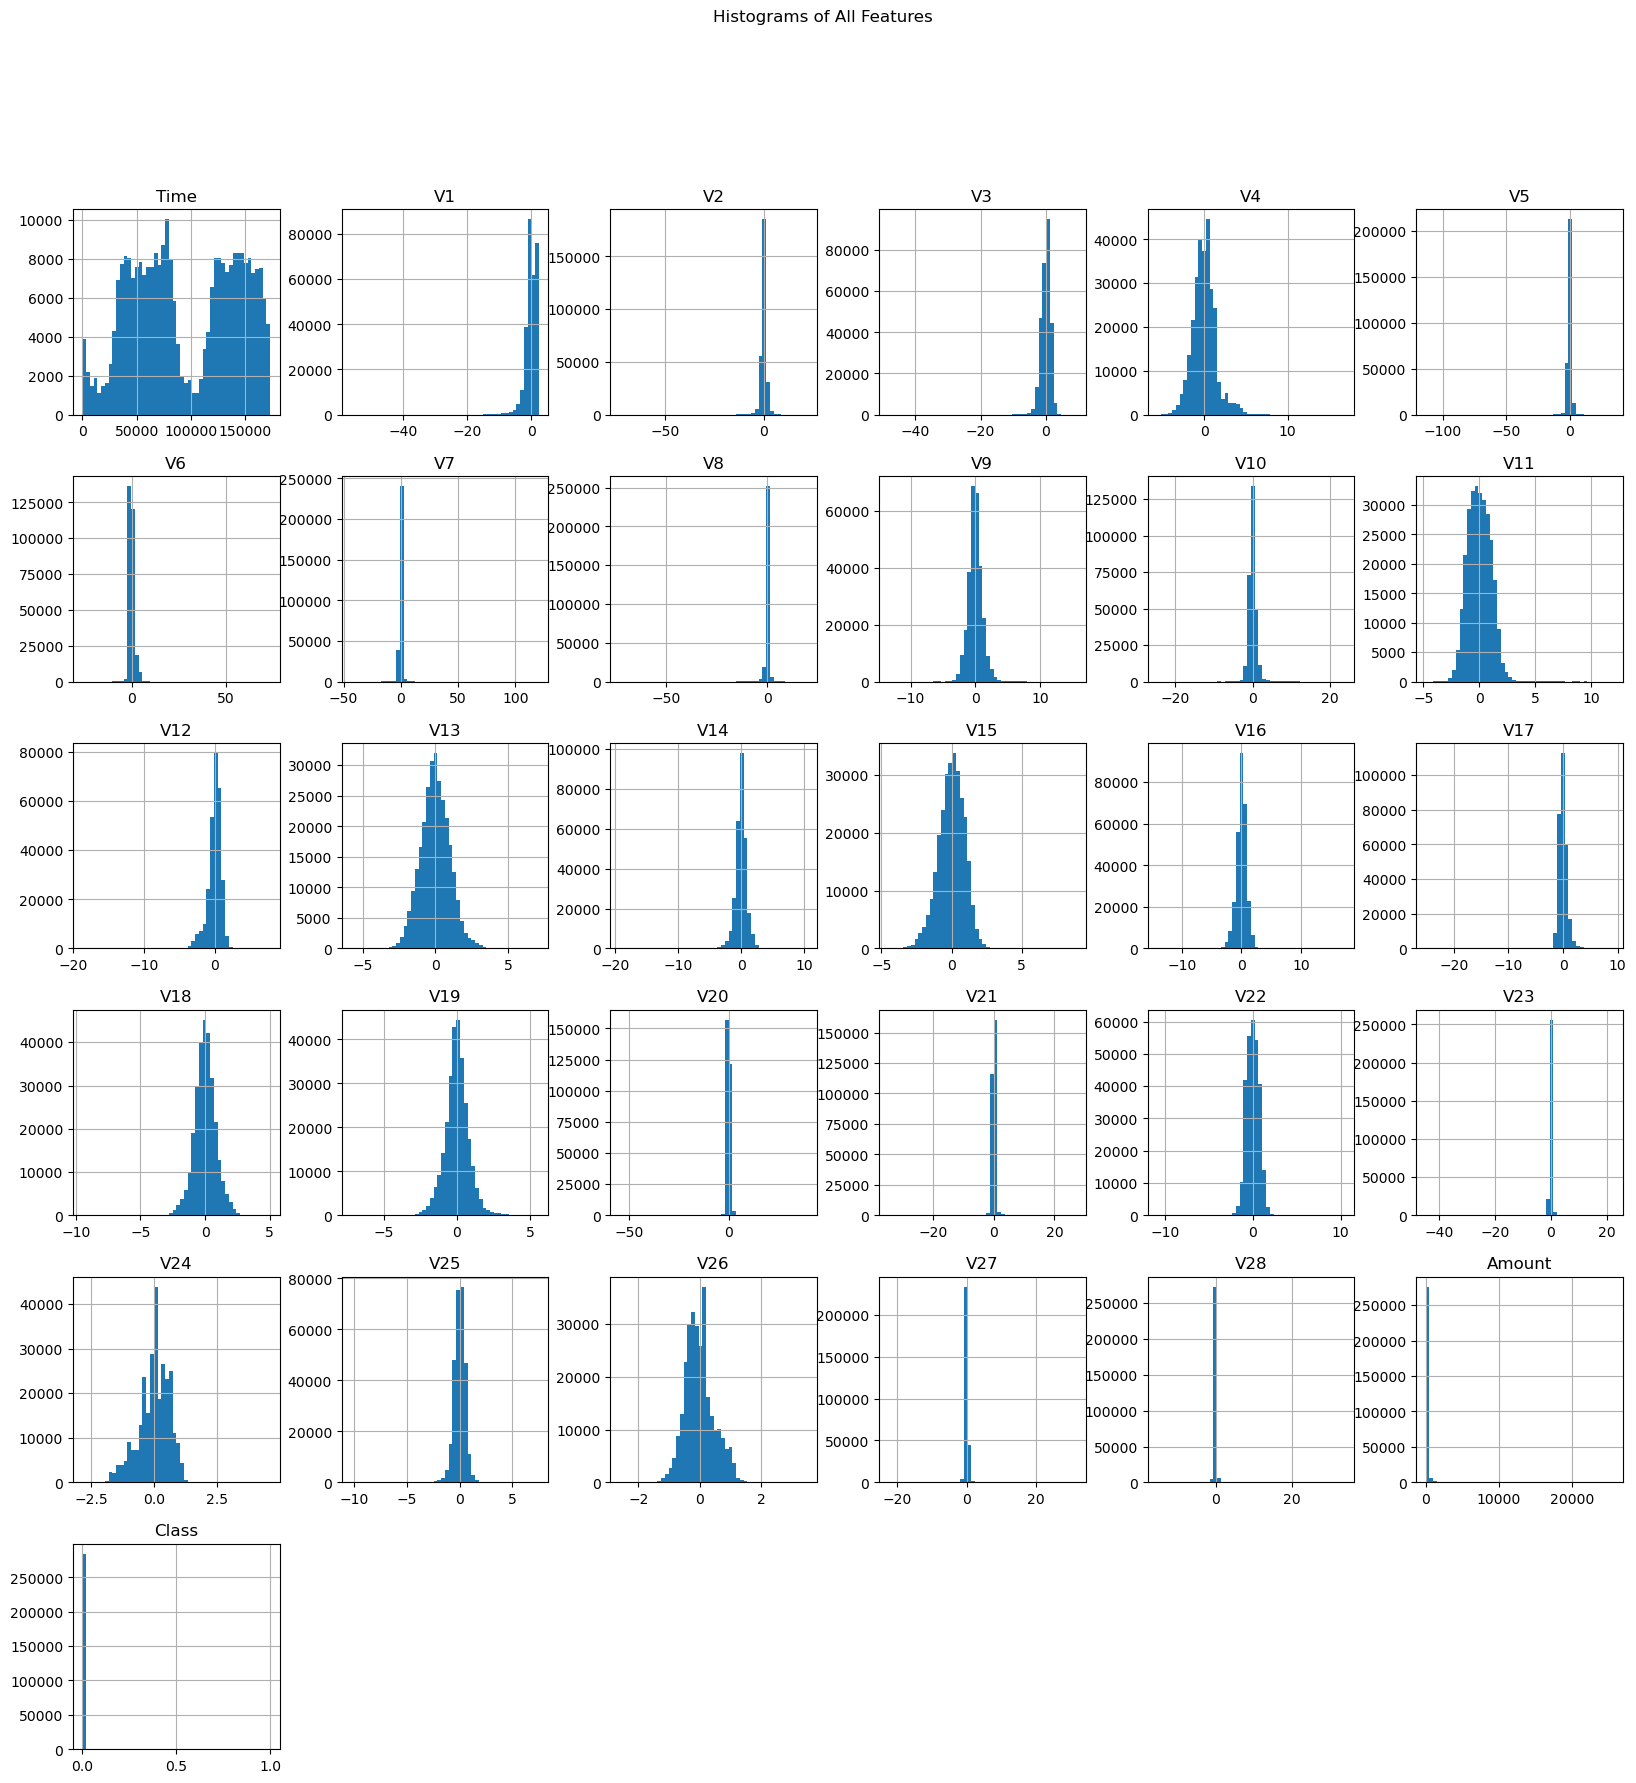

In [11]:
# Histograms of the features
credit.hist(figsize=(20, 20), bins=50)
plt.suptitle('Histograms of All Features')
plt.show()

In [12]:
fraud = credit[credit['Class']== 1] 
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [13]:
fraud.shape

(492, 31)

In [14]:
not_fraud = credit[credit['Class']== 0] 
not_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [15]:
not_fraud.shape

(284315, 31)

In [16]:
# Finding Length of all cases
total_len = len(credit)
fraud_len = len(credit[credit['Class'] == 1])
not_fraud_len = len(credit[credit['Class'] == 0])

percentage_of_fraud = (fraud_len/ total_len) * 100
percentage_of_not_fraud = (not_fraud_len/ total_len) * 100
print(f"The percentage of fraud cases: {percentage_of_fraud: .2f}%")
print(f"The percentage of fraud cases: {percentage_of_not_fraud: .2f}%")

The percentage of fraud cases:  0.17%
The percentage of fraud cases:  99.83%


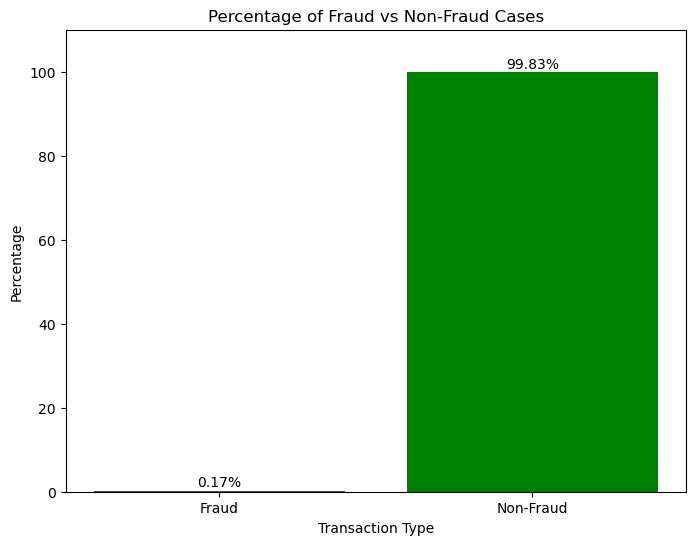

In [17]:
# Create the bar chart
labels = ['Fraud', 'Non-Fraud']
percentages = [percentage_of_fraud, percentage_of_not_fraud]

plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=['red', 'green'])
plt.xlabel('Transaction Type')
plt.ylabel('Percentage')
plt.title('Percentage of Fraud vs Non-Fraud Cases')
plt.ylim(0, 110)

# Display the percentage on top of each bar
for i, v in enumerate(percentages):
    plt.text(i, v+1, f"{v:.2f}%", ha='center')

plt.show()

In [18]:
tmp = credit[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']

In [19]:
class_0.describe() # Real Transactions

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
class_1.describe() # Fraud Transactions

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [21]:
# Real transactions have have lower mean, std, and Q3 while having larger Q1, Q2. 
# Fraud Transactions have lower Q1, Q2, while having larger mean, std, and Q3.

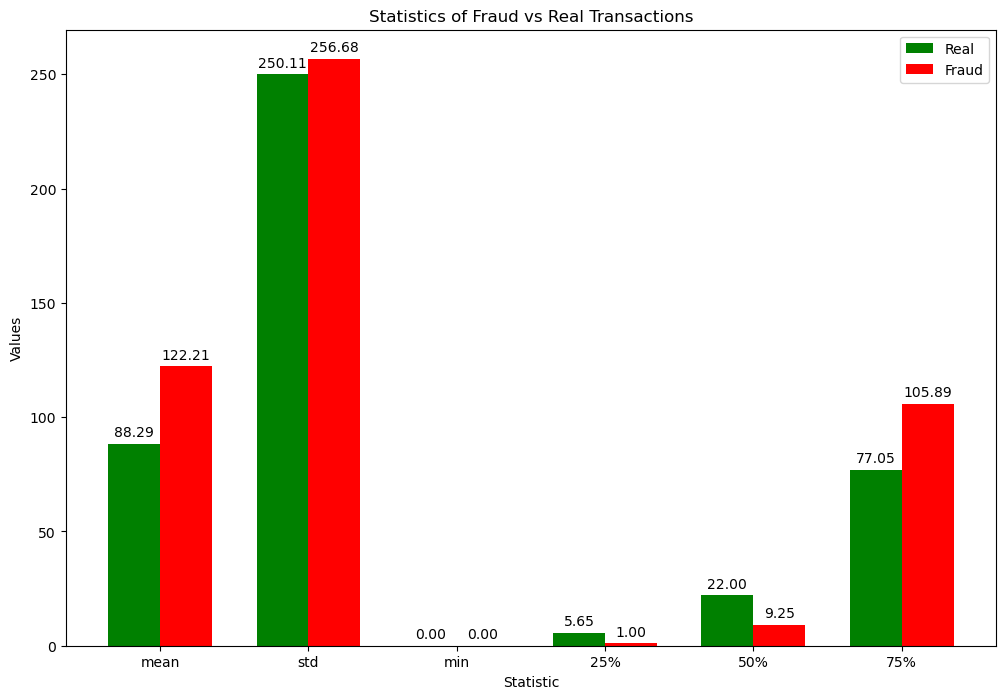

In [22]:
# Creating side by side bar graphs to showcase the stats described above. (Does not include Count & Max)
stats1 = {
    'mean': 88.29,
    'std': 250.11,
    'min': 0.0,
    '25%': 5.65,
    '50%': 22.0,
    '75%': 77.05,
}

# Data for the second set of summary statistics
stats2 = {
    'mean': 122.21,
    'std': 256.68,
    'min': 0.0,
    '25%': 1.0,
    '50%': 9.25,
    '75%': 105.89,
}

# Create a DataFrame for easy manipulation (optional, you can also work with dicts directly)
labels = list(stats1.keys())
values1 = list(stats1.values())
values2 = list(stats2.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.bar(x - width/2, values1, width, label='Real', color='green')
bars2 = ax.bar(x + width/2, values2, width, label='Fraud', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Statistic')
ax.set_ylabel('Values')
ax.set_title('Statistics of Fraud vs Real Transactions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to annotate bars with values
def annotate_bars(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.annotate(f'{value:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Annotate bars with the values
annotate_bars(bars1, values1)
annotate_bars(bars2, values2)

# Display the plot
plt.show()

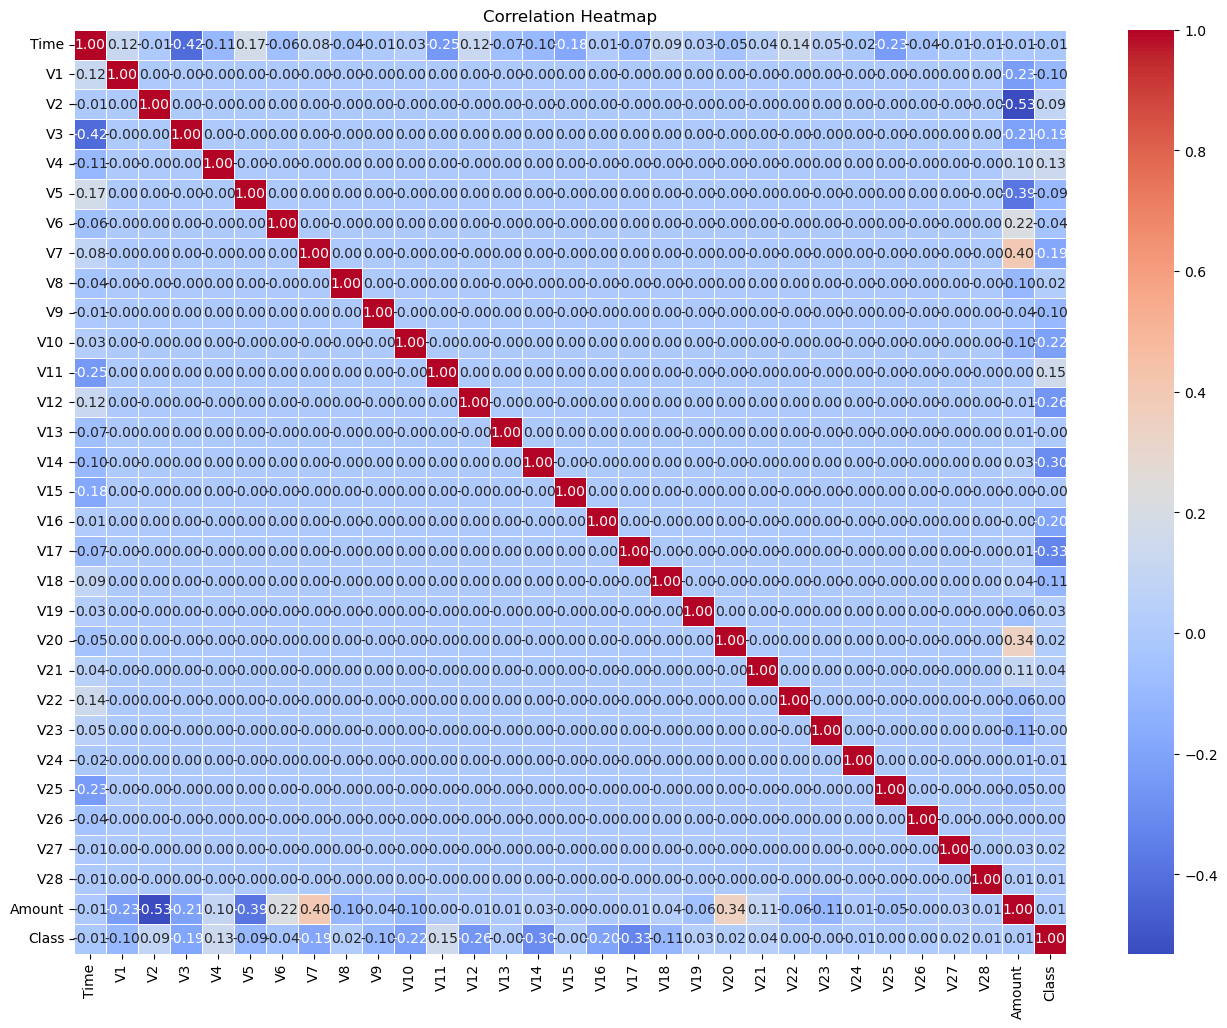

In [24]:
# Correlation heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = credit.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
X = credit.drop("Class", axis=1)
y = credit['Class']

In [26]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [27]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

## Training the Data

In [28]:
# Improving performance of data by scalinging it between the ranges of [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.00000000e+00, 9.35192337e-01, 7.66490419e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [0.00000000e+00, 9.78541955e-01, 7.70066651e-01, ...,
        4.16345145e-01, 3.13422663e-01, 1.04705276e-04],
       [5.78730497e-06, 9.35217023e-01, 7.53117667e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [9.99976851e-01, 9.90904812e-01, 7.64079694e-01, ...,
        4.16593177e-01, 3.12584864e-01, 2.64215395e-03],
       [9.99976851e-01, 9.54208999e-01, 7.72855742e-01, ...,
        4.18519535e-01, 3.15245157e-01, 3.89238944e-04],
       [1.00000000e+00, 9.49231759e-01, 7.65256401e-01, ...,
        4.16466371e-01, 3.13400843e-01, 8.44648509e-03]])

In [29]:
# Random State used to make sure we get same results whenever we run the line
# Stratify used to make sure we have the same porportion of erach class as the original dataset

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify = y)

In [30]:
# How many fraud and real cases are being trained
y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [31]:
# How many fraud and real cases are being tested
y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

In [32]:
# Smote used to generate samples for the minority class to balance the class distribution
# This will help improve model training and accuracy
smote = SMOTE(random_state=0)

X_train, y_train = smote.fit_resample(X_train,y_train)
X_test, y_test = smote.fit_resample(X_test,y_test)

In [33]:
y_train.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

# Model LogisticRegression

LogisticRegression()
Accuracy :  0.9509795301069218 Recall :  0.9746432471450517 F1 :  0.9497263127519321


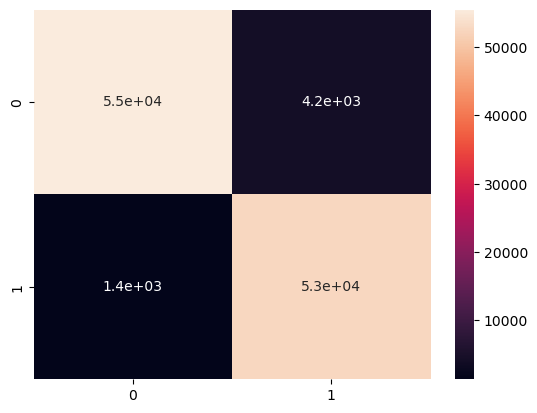

In [48]:
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)
pre = model_LR.predict(X_test)

accuracy = accuracy_score(pre,y_test)
recall = recall_score(pre,y_test)
f1 = f1_score(pre,y_test)

sns.heatmap(confusion_matrix(pre,y_test),annot=True)
print(model_LR)
print('Accuracy : ',accuracy,'Recall : ',recall,"F1 : ",f1)

In [49]:
# Performing gridSearch Cross Validation

grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}  # l2 ridge
    
grid_lr = GridSearchCV(model_LR, grid, cv=3, scoring='roc_auc')
grid_lr.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",grid_lr.best_params_)
print("accuracy :",grid_lr.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.9893752827231156


LogisticRegression(C=100.0, random_state=1)
Accuracy :  0.9518588210467079 Recall :  0.9736575294486332 F1 :  0.9507249507249507


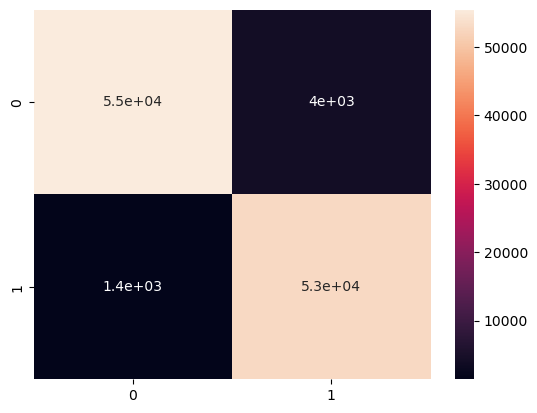

In [50]:
# Fitting the model with the best parameters

best_LR = LogisticRegression(C = 100.0, penalty = 'l2', random_state =1)
best_LR_fit = best_LR.fit(X_train, y_train)
evaluate(best_LR_fit)

# Model KNeighborsClassifier

In [38]:
model_KNN = KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=3)
Accuracy :  0.9463808384918402 Recall :  0.9987032889308027 F1 :  0.9434123345891873


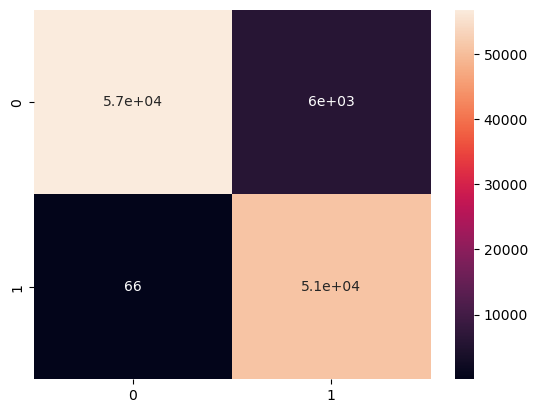

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)

knn_clf = knn.fit(X_train,y_train)

evaluate(knn_clf)

In [51]:
classification_report(pre,y_test)

'              precision    recall  f1-score   support\n\n           0       0.98      0.93      0.95     59699\n           1       0.93      0.97      0.95     54029\n\n    accuracy                           0.95    113728\n   macro avg       0.95      0.95      0.95    113728\nweighted avg       0.95      0.95      0.95    113728\n'